In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


**Importing data**

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Data Preprocessing**

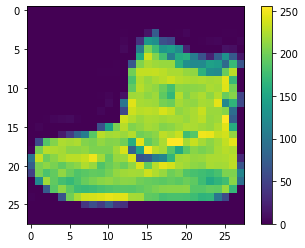

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

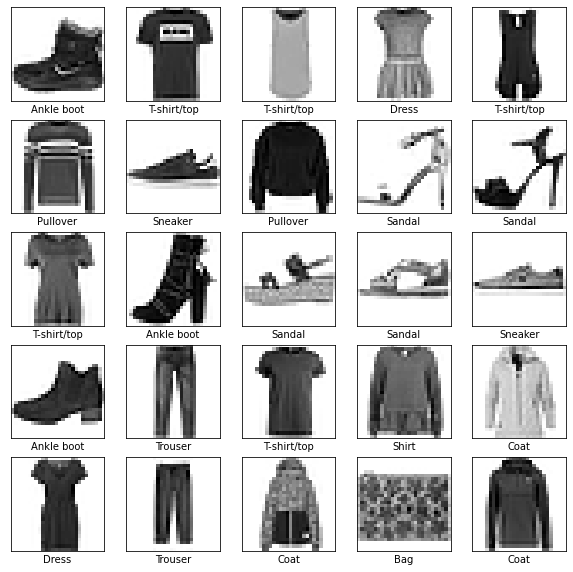

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Modeling**

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5020 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2982 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2715 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2604 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3411 - accuracy: 0.8811 - 533ms/epoch - 2ms/step

Test accuracy: 0.8810999989509583


**Model Predictions**

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([7.30999091e-07, 1.90367788e-09, 7.06697989e-09, 3.67961150e-09,
       6.43429530e-07, 2.34804116e-04, 1.45933470e-07, 1.22904265e-02,
       5.56181647e-07, 9.87472653e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. we can see which label has the highest confidence value:

In [12]:
np.argmax(predictions[0])
test_labels[0]

9

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Model Evaluation**

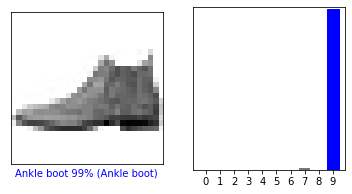

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

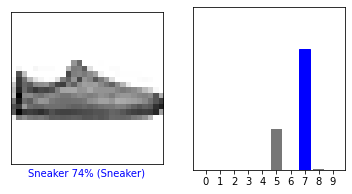

In [15]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

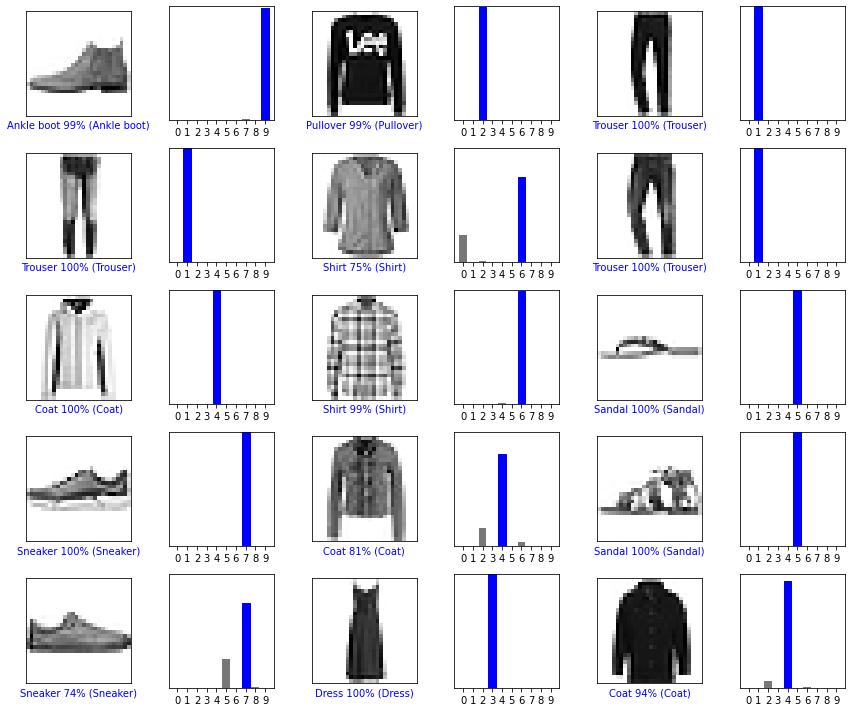

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Use the trained model**

Finally, use the trained model to make a prediction about a single image.

In [17]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [18]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [19]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3727313e-04 6.7483526e-15 9.9361610e-01 2.5208449e-10 4.8200595e-03
  5.8747021e-11 1.4265813e-03 2.2990637e-13 1.6395685e-11 1.1435406e-11]]


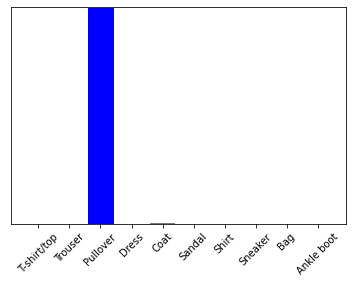

In [20]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [21]:
np.argmax(predictions_single[0])

2